<a href="https://colab.research.google.com/github/vinaylanjewar/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_CP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

#**Data Description** -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

#**Importing Libraries**

In [32]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve


In [33]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#Reading a data file
df = pd.read_csv('/content/drive/MyDrive/Capstone project 3/train.csv')

In [35]:
#It gives Top 5 rows of Dataset 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
#It gives last 5 rows of Dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [37]:
# It gives Total number of rows and columns of dataset
df.shape

(2000, 21)

In [38]:
#It gives some basic statistical details like percentile, mean, std, max etc.
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [39]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [40]:
#It gives total columns, data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [41]:
#null values sum of target variable ('price_range')
df['price_range'].isnull().sum()

0

In [42]:
#It counts the value of each class
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [43]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

# 1010 mobiles have bluetooth and 990 does not have bluetooth

In [44]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

# 1019 mobiles contains dual sim slot and 981 mobiles are not

In [45]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

# 1043 mobiles have four_g facility and 957 are not

In [46]:
df['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

# There are 10 different mobile-depths in the dataset

In [47]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

# Dataset contains 8 different cores 

# **Explortory Data Analysis**

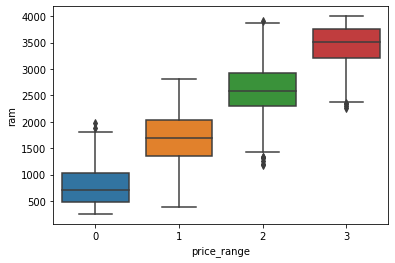

In [48]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= df)
plt.show()

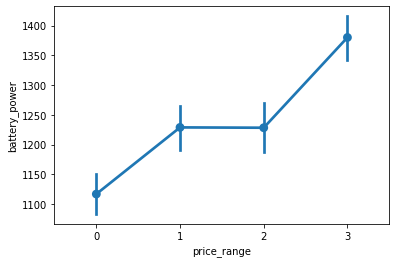

In [49]:
sns.pointplot(y= 'battery_power', x = 'price_range', data=df)

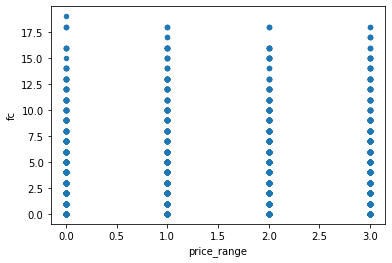

In [50]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

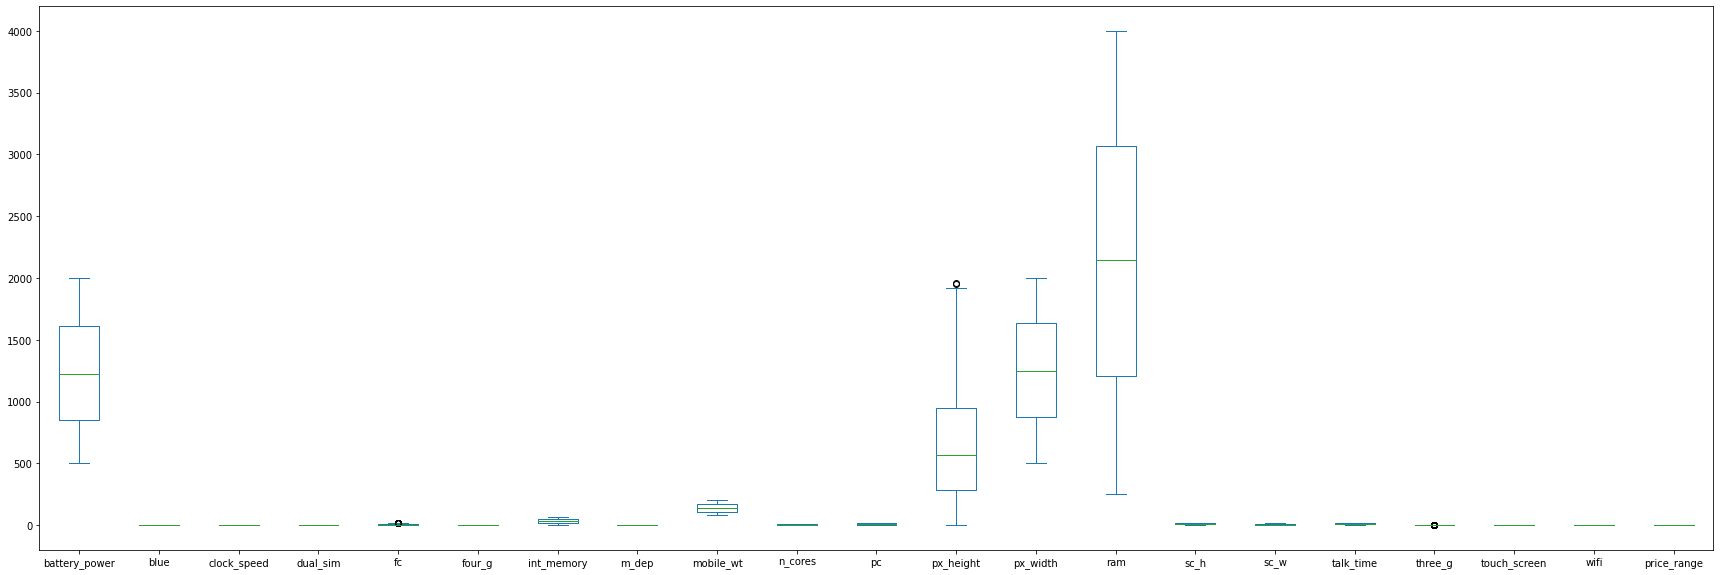

In [51]:
df.plot(kind='box',figsize=(30,10))
plt.show()
#outlayers

# **Plotting Relation between Price Range & Battery Power**

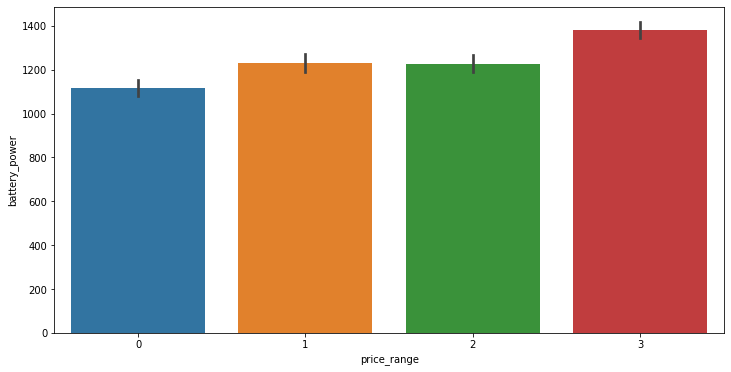

In [52]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=df)
plt.show()

# **Plotting Relation between Price Range & Pixel Height/Width**

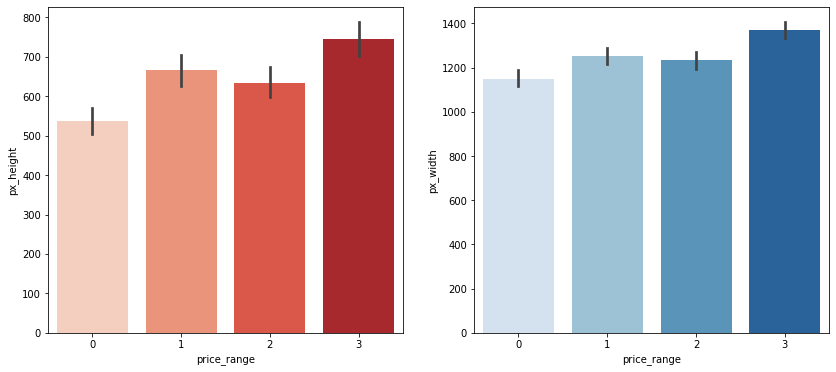

In [53]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df , palette = 'Blues')
plt.show()

## **Plotting Relation between Price Range & RAM**

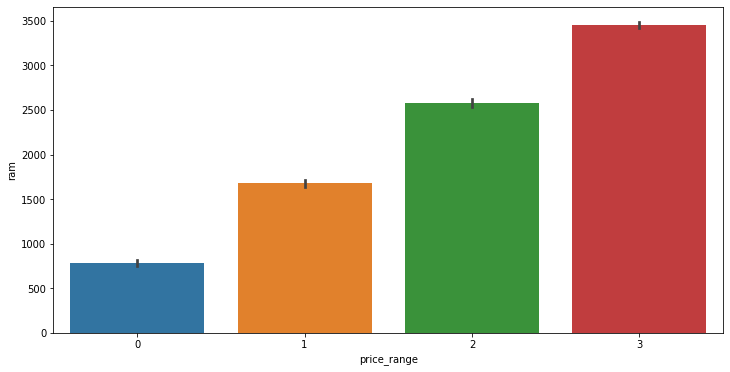

In [54]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'ram',data=df)
plt.show()

## Plotting Relation between Price Range & 3G/4G

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


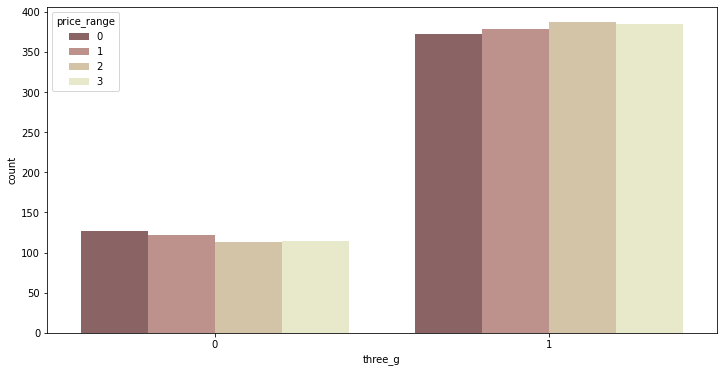

In [55]:
plt.figure(figsize = (12,6))
sns.countplot(df['three_g'] , hue = df['price_range'] , palette = 'pink')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


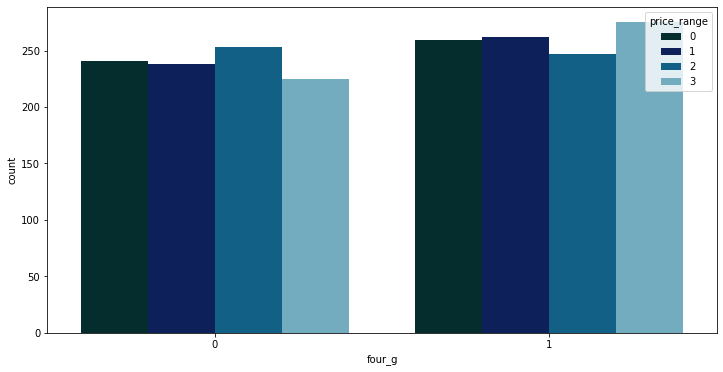

In [56]:
plt.figure(figsize = (12,6))
sns.countplot(df['four_g'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

# **Plotting Relation between Price Range & Memory**

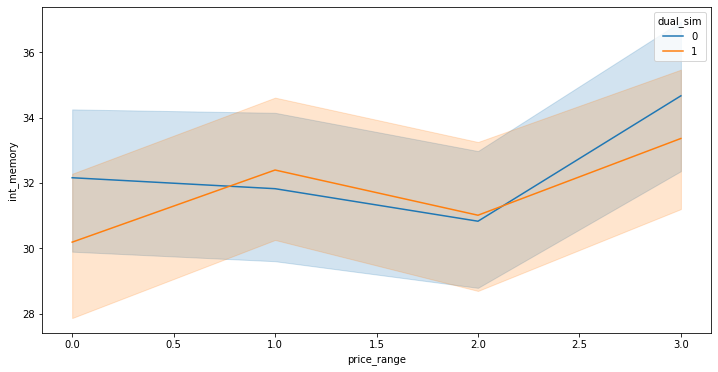

In [57]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = df , hue = 'dual_sim')
plt.show()

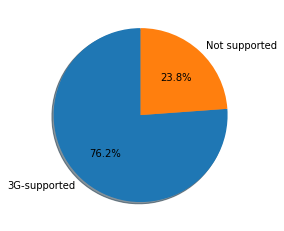

In [58]:
#percentage of phones which support 3g
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

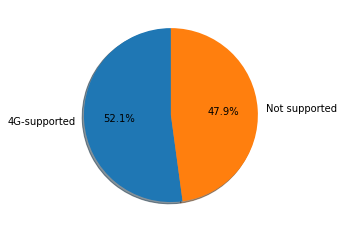

In [59]:
#percentage of phones which support 4g
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

# `Correlation`

In [60]:
#correlation
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


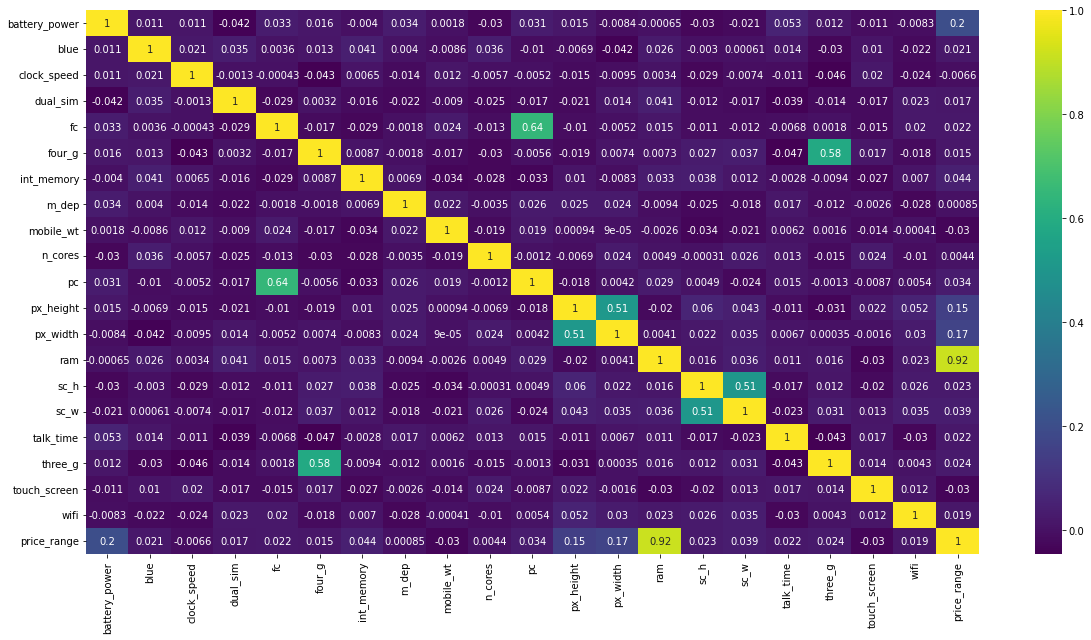

In [61]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap='viridis', annot=True)

so clock_speed,mobile_wt,touch_screen are negative correlation with target `variable so we can ignore it`

In [62]:
#dropping the irrelevent features
df.drop(['touch_screen','mobile_wt','clock_speed'],axis=1,inplace=True)

In [63]:
#independent variables
X = df.drop('price_range',axis=1)

In [64]:
#dependent variable
y = df['price_range']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [66]:
print(X_train.shape)
print(X_test.shape)


(1340, 17)
(660, 17)


#**KNN Classifier**

In [67]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

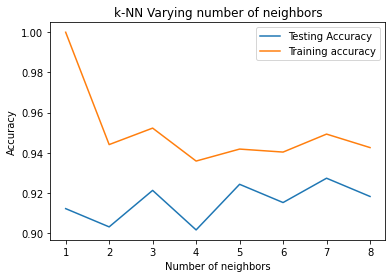

In [68]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [69]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [70]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [71]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.9272727272727272

In [72]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9492537313432836

In [73]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [74]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [75]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[159,   6,   0,   0],
       [  6, 153,   6,   0],
       [  0,   8, 149,   8],
       [  0,   0,  14, 151]])

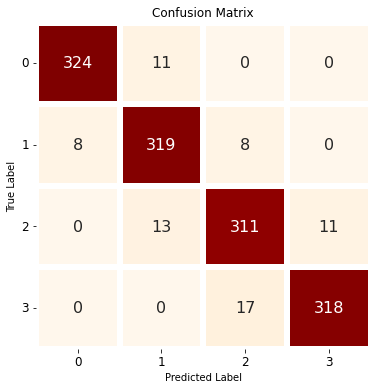

In [76]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

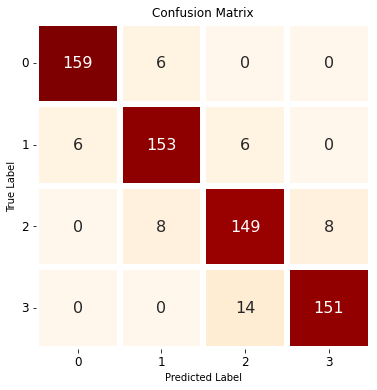

In [77]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [78]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [79]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9929736761554945

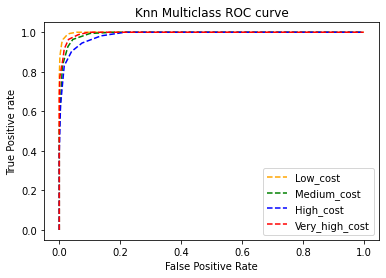

In [80]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [81]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       335
           2       0.93      0.93      0.93       335
           3       0.97      0.95      0.96       335

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



In [82]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       165
           1       0.92      0.93      0.92       165
           2       0.88      0.90      0.89       165
           3       0.95      0.92      0.93       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [83]:
y_test_pred

array([0, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 0, 3, 0, 0, 2, 0, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 2, 0, 0, 1, 2, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 2, 3, 0, 2, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 1, 1, 0, 1, 2, 3, 3, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 3, 2, 3, 2, 3, 0, 3, 1, 2, 1, 3, 1,
       2, 0, 0, 1, 3, 3, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 0,
       1, 0, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 3, 3, 2, 0, 2, 1, 0, 0, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 0, 3, 3, 1, 2, 3, 0, 2, 3, 0, 0, 0, 2,

In [84]:
y_test

1294    0
403     2
125     3
1871    3
297     1
       ..
303     3
1638    2
1804    1
893     1
262     0
Name: price_range, Length: 660, dtype: int64

#**Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [87]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [88]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [89]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=50)

In [90]:
rf_optimal_model = rf_grid.best_estimator_

In [91]:
#best parameters for the data
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [92]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [93]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [94]:
len(train_preds)

1340

In [95]:
train_class_preds

array([2, 0, 0, ..., 3, 0, 0])

In [96]:
test_class_preds

array([0, 1, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 1, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 2, 2, 2, 3,
       1, 2, 2, 0, 3, 0, 1, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 1, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 1, 0, 0, 0, 2, 3, 3, 2, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 3, 1,
       3, 0, 1, 0, 1, 1, 0, 2, 1, 0, 3, 2, 2, 1, 3, 0, 3, 0, 1, 1, 3, 1,
       2, 0, 1, 0, 3, 3, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 1,
       1, 0, 1, 2, 1, 0, 2, 2, 1, 3, 3, 0, 2, 3, 3, 0, 1, 1, 1, 1, 3, 2,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 0,
       1, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 1, 3, 3, 2, 0, 1, 2, 0, 0, 3, 0, 3, 2, 3, 0, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       0, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 0, 0, 0, 1,

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8626865671641791
The accuracy on test dataset is 0.7909090909090909


In [99]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [100]:
train_cm

array([[321,  14,   0,   0],
       [ 39, 261,  35,   0],
       [  0,  59, 250,  26],
       [  0,   0,  11, 324]])

In [101]:
test_cm

array([[151,  14,   0,   0],
       [ 19, 119,  27,   0],
       [  0,  38,  97,  30],
       [  0,   0,  10, 155]])

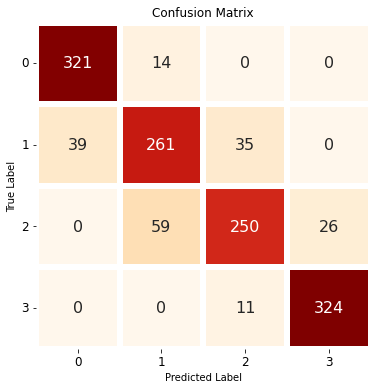

In [102]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

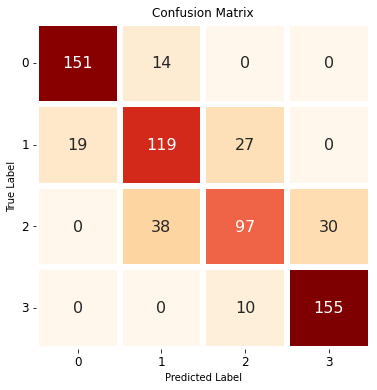

In [103]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [104]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       335
           1       0.78      0.78      0.78       335
           2       0.84      0.75      0.79       335
           3       0.93      0.97      0.95       335

    accuracy                           0.86      1340
   macro avg       0.86      0.86      0.86      1340
weighted avg       0.86      0.86      0.86      1340



In [105]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       165
           1       0.70      0.72      0.71       165
           2       0.72      0.59      0.65       165
           3       0.84      0.94      0.89       165

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.79      0.79      0.79       660



#**GradientBoostingClassifier**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
state = 12  
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [108]:
#Find the best learning rate value 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.797
Accuracy score (validation): 0.772
Learning rate:  0.075
Accuracy score (training): 0.800
Accuracy score (validation): 0.777
Learning rate:  0.1
Accuracy score (training): 0.829
Accuracy score (validation): 0.797
Learning rate:  0.25
Accuracy score (training): 0.935
Accuracy score (validation): 0.856
Learning rate:  0.5
Accuracy score (training): 0.978
Accuracy score (validation): 0.880
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (validation): 0.885
Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.892


In [109]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[101   6   0   0]
 [ 10 106   7   0]
 [  0  12  88   6]
 [  0   0   7 100]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       107
           1       0.85      0.86      0.86       123
           2       0.86      0.83      0.85       106
           3       0.94      0.93      0.94       107

    accuracy                           0.89       443
   macro avg       0.89      0.89      0.89       443
weighted avg       0.89      0.89      0.89       443



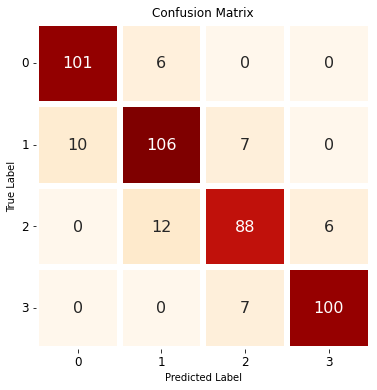

In [110]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predictions)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [111]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_test, y_test)
test_pred = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, test_pred))

print("Classification Report")
print(classification_report(y_val, test_pred))

Confusion Matrix:
[[103   3   1   0]
 [  9 104  10   0]
 [  0  11  81  14]
 [  0   0   9  98]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.88      0.85      0.86       123
           2       0.80      0.76      0.78       106
           3       0.88      0.92      0.89       107

    accuracy                           0.87       443
   macro avg       0.87      0.87      0.87       443
weighted avg       0.87      0.87      0.87       443



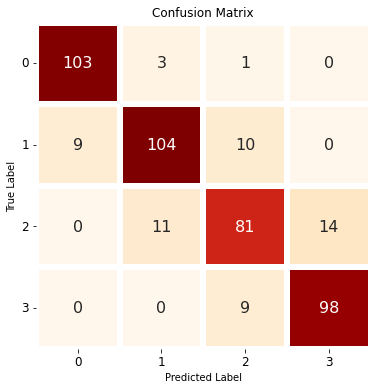

In [112]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()